In [13]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ------------- Classics ------------- #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# ------------- MNIST dataset ------------- #
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# ------------- Custom Neural Network ------------- #
import importlib
import neural_network as nn
importlib.reload(nn)

<module 'neural_network' from '/mnt/c/Users/Asura/Documents/Programming Projects/LSDS/DS-Unit-4-Sprint-2-Neural-Networks/module2-backpropagation/neural_network.py'>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [7]:
data = {
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y' : [0, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1


In [8]:
# Split features, and target from df

X = df[['x1', 'x2', 'x3']].to_numpy()
y = df['y'].to_numpy().reshape(-1, 1)

print('----- Shape of data ------')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

----- Shape of data ------
X.shape: (7, 3)
y.shape: (7, 1)


+---------EPOCH 1---------+
Loss: 
 0.4895384186344331
+---------EPOCH 2---------+
Loss: 
 0.4901344868430913
+---------EPOCH 3---------+
Loss: 
 0.49072414341982445
+---------EPOCH 4---------+
Loss: 
 0.49130746211581594
+---------EPOCH 5---------+
Loss: 
 0.491884516190474
+---------EPOCH 100---------+
Loss: 
 0.5267365972804401
+---------EPOCH 200---------+
Loss: 
 0.5423234727948433
+---------EPOCH 300---------+
Loss: 
 0.550282830047672
+---------EPOCH 400---------+
Loss: 
 0.5549868816732797
+---------EPOCH 500---------+
Loss: 
 0.5580531746301419
+---------EPOCH 600---------+
Loss: 
 0.5601941043109536
+---------EPOCH 700---------+
Loss: 
 0.5617662367713198
+---------EPOCH 800---------+
Loss: 
 0.5629658746607274
+---------EPOCH 900---------+
Loss: 
 0.5639092754494984
+---------EPOCH 1000---------+
Loss: 
 0.5646693669800537


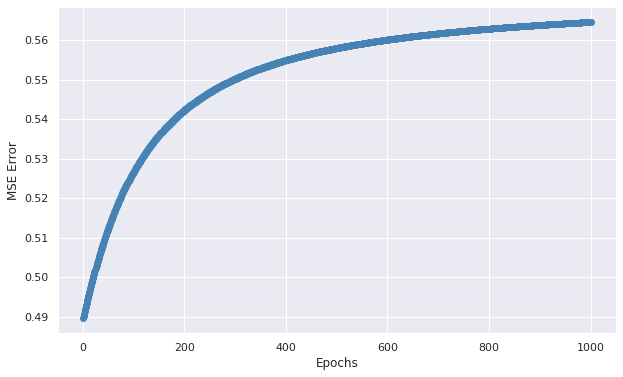

In [10]:
single_hidden_nn = nn.SingleHiddenLayerNN(input_layer_size = X.shape[1], hidden_layer_size = 4, output_layer_size = 1, iters=1000)
single_hidden_nn.fit(X, y, verbose=True)
single_hidden_nn.plot_loss()

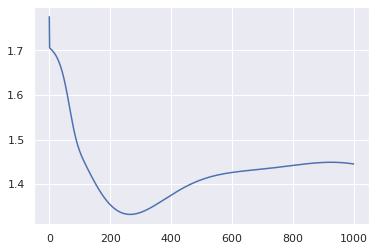

In [14]:
two_layer_nn = nn.TwoLayerNetSimple(input_dim = 3, hidden_dim = 4, output_dim = 1, iterations=1000)
two_layer_nn.fit(X, y)
plt.plot(np.array(two_layer_nn.loss));

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Now the data should be in a format you're more familiar with
x_train.shape

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [ ]:
y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [ ]:
# A Nice Binary target for ya to work with
y_train

### Estimating Your `net

In [ ]:
##### Your Code Here #####



## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?